In [169]:
#Importing necessary libraries
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import TensorBoard
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix

In [170]:
## creating a dataframe and importing the data.
#Current working directory and file path
current_wd= os.getcwd() 
#Read train CSV from Filepath
file_path1= os.path.join(current_wd,'mnist_train.csv') 
file_path2= os.path.join(current_wd,'mnist_test.csv') 

mnist_train = np.loadtxt(file_path1, delimiter=",")
mnist_test = np.loadtxt(file_path2, delimiter=",") 
#type(mnist_train)

# Splitting the mnist train and test data into x_train, y_train, x_test and y_test
x_train_mnist = mnist_train[:,1:785]
y_train_mnist = mnist_train[:,0]
x_test_mnist = mnist_test[:,1:785]
y_test_mnist = mnist_test[:,0]

print("Training Data Shape is {}".format(x_train_mnist.shape))
print("Training Labels Shape is {}".format(y_train_mnist[:,None].shape))
print("Testing Data Shape is {}".format(x_test_mnist.shape))
print("Testing Labels Shape is {}".format(y_test_mnist[:,None].shape))

Training Data Shape is (60000, 784)
Training Labels Shape is (60000, 1)
Testing Data Shape is (10000, 784)
Testing Labels Shape is (10000, 1)


In [171]:
print("Sample Training Data is {}".format(x_train_mnist[0]))

Sample Training Data is [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   

In [172]:
print("Sample Training label is {}".format(y_train_mnist[0:5]))

Sample Training label is [5. 0. 4. 1. 9.]


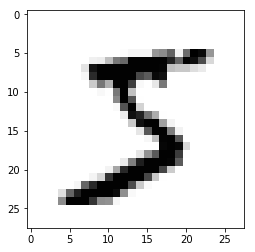

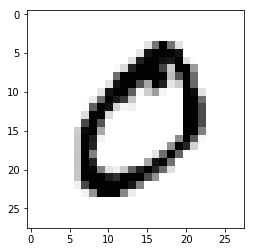

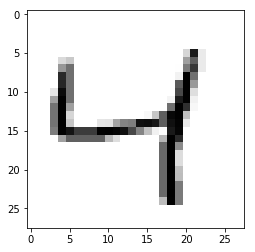

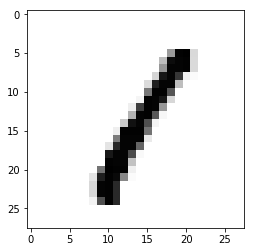

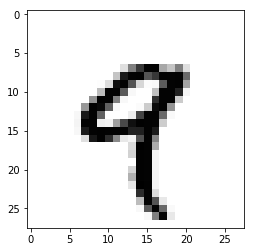

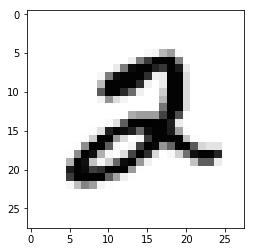

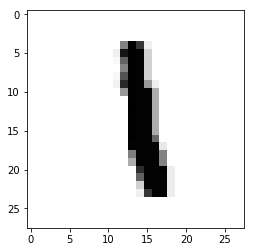

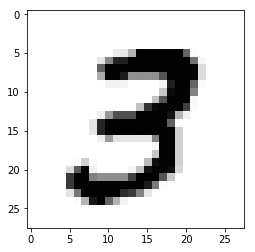

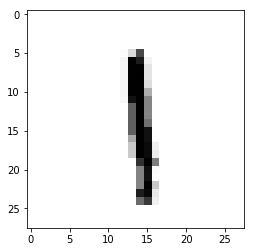

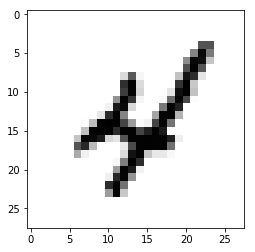

In [173]:
# Loop for displaying the grey scale image 
for i in range(10):
    image = x_train_mnist[i].reshape((28,28))
    plt.imshow(image, cmap="Greys") #plt.cm.binary
    plt.show()

In [174]:
# Normalizing the mnist data inorder for better performance
x_train_mnist = tf.keras.utils.normalize(x_train_mnist, axis = 1)
x_test_mnist = tf.keras.utils.normalize(x_test_mnist,axis = 1)

##Printing normalized mnist data
print("Training Data after normalizing is {}".format(x_train_mnist[0]))
print("Testing  Data after normalizing is {}".format(x_test_mnist[0]))

Training Data after normalizing is [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.       

In [175]:
## Neural network model 1 by taking mnist input and getting 10 output 

model = tf.keras.models.Sequential() # running the model in sequence

model.add(tf.keras.layers.Flatten()) # flatten to convert 2d data to 1D data

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) ## giving a dense layer(hidden layer) of 128 and using Relu as a activation function. Mathematically, it is defined as y = max(0, x)

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) ## giving another dense layer(hidden layer) of 128

model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # softmax for probability distribution 

model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] ) 

history = model.fit(x_train_mnist,y_train_mnist,epochs = 3 ,validation_data=(x_test_mnist,y_test_mnist) ) # Fitting the model with 3 epochs 

pred = model.predict([x_test_mnist])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3227 - accuracy: 0.9062 - val_loss: 0.1655 - val_accuracy: 0.9491
Epoch 2/3
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1388 - accuracy: 0.9582 - val_loss: 0.1219 - val_accuracy: 0.9618
Epoch 3/3
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0983 - accuracy: 0.9694 - val_loss: 0.0973 - val_accuracy: 0.9688


In [176]:
## Function for converting the integer data to seven segment display value
def dispZero():
    seven_seg_disp = [1, 1, 1, 1, 1, 1, 0]
    return seven_seg_disp

def dispOne():
    seven_seg_disp = [0, 1, 1, 0, 0, 0, 0]
    return seven_seg_disp

def dispTwo():
    seven_seg_disp = [1, 1, 0, 1, 1, 0, 1]
    return seven_seg_disp

def dispThree():
    seven_seg_disp = [1, 1, 1, 1, 0, 0, 1]
    return seven_seg_disp

def dispFour():
    seven_seg_disp = [0, 1, 1, 0, 0, 1, 1]
    return seven_seg_disp

def dispFive():
    seven_seg_disp = [1, 0, 1, 1, 0, 1, 1]
    return seven_seg_disp

def dispSix():
    seven_seg_disp = [1, 0, 1, 1, 1, 1, 1]
    return seven_seg_disp

def dispSeven():
    seven_seg_disp = [1, 1, 1, 0, 0, 0, 0]
    return seven_seg_disp

def dispEight():
    seven_seg_disp = [1, 1, 1, 1, 1, 1, 1]
    return seven_seg_disp

def dispNine():
    seven_seg_disp = [1, 1, 1, 0, 0, 1, 1]
    return seven_seg_disp

def invalid_Case():
    print("The data is not valid")

In [177]:
## Creating a seven segment array for appending individual integer binary value for y_train data
seven_seg_arr=[]
tempList=[]
for i in range(len(y_train_mnist)):
    if(y_train_mnist[i] == 0):
        tempList = dispZero()
        seven_seg_arr.append(tempList)
    elif(y_train_mnist[i] == 1):
        tempList = dispOne()
        seven_seg_arr.append(tempList)
    elif(y_train_mnist[i] == 2):
        tempList = dispTwo()
        seven_seg_arr.append(tempList)
    elif(y_train_mnist[i] == 3):
        tempList = dispThree()
        seven_seg_arr.append(tempList)
    elif(y_train_mnist[i] == 4):
        tempList = dispFour()
        seven_seg_arr.append(tempList)
    elif(y_train_mnist[i] == 5):
        tempList = dispFive()
        seven_seg_arr.append(tempList)
    elif(y_train_mnist[i] == 6):
        tempList = dispSix()
        seven_seg_arr.append(tempList) 
    elif(y_train_mnist[i] == 7):
        tempList = dispSeven()
        seven_seg_arr.append(tempList) 
    elif(y_train_mnist[i] == 8):
        tempList = dispEight()
        seven_seg_arr.append(tempList)
    elif(y_train_mnist[i] == 9):
        tempList = dispNine()
        seven_seg_arr.append(tempList)
    else:
        break

y_train_seg_array = np.asarray(seven_seg_arr)

In [178]:
## Creating a seven segment array for appending individual integer binary value for y_test data
seven_seg_arr2=[]
tempList=[]
for i in range(len(y_test_mnist)):
    if(y_test_mnist[i] == 0):
        tempList = dispZero()
        seven_seg_arr2.append(tempList)
    elif(y_test_mnist[i] == 1):
        tempList = dispOne()
        seven_seg_arr2.append(tempList)
    elif(y_test_mnist[i] == 2):
        tempList = dispTwo()
        seven_seg_arr2.append(tempList)
    elif(y_test_mnist[i] == 3):
        tempList = dispThree()
        seven_seg_arr2.append(tempList)
    elif(y_test_mnist[i] == 4):
        tempList = dispFour()
        seven_seg_arr2.append(tempList)
    elif(y_test_mnist[i] == 5):
        tempList = dispFive()
        seven_seg_arr2.append(tempList)
    elif(y_test_mnist[i] == 6):
        tempList = dispSix()
        seven_seg_arr2.append(tempList) 
    elif(y_test_mnist[i] == 7):
        tempList = dispSeven()
        seven_seg_arr2.append(tempList) 
    elif(y_test_mnist[i] == 8):
        tempList = dispEight()
        seven_seg_arr2.append(tempList)
    elif(y_test_mnist[i] == 9):
        tempList = dispNine()
        seven_seg_arr2.append(tempList)
    else:
        break

y_test_seg_array = np.asarray(seven_seg_arr2)

In [179]:
## Reshaping the data in order to use the data for second model
x_train_mnist = x_train_mnist.reshape(60000,28*28)
x_test_mnist = x_test_mnist.reshape(10000, 28*28)

In [180]:
# Using second neural network for getting the 7 output by passing the 10 input

model1 = tf.keras.models.Sequential() # running the model in sequence

model1.add(tf.keras.layers.Flatten()) # flatten to convert 2d data to 1D data

model1.add(tf.keras.layers.Dense(128,activation=tf.nn.relu, input_dim=7)) ## giving a dense layer(hidden layer) of 128 and using Relu as a activation function. Mathematically, it is defined as y = max(0, x)

model1.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) ## giving another dense layer(hidden layer) of 128

model1.add(tf.keras.layers.Dense(7,activation=tf.nn.sigmoid)) # softmax for probability distribution and having 7 output 

model1.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'] ) 

history = model1.fit(x_train_mnist, y_train_seg_array, epochs = 3,validation_data=(x_test_mnist,y_test_seg_array) ) 

pred1 = model1.predict([x_test_mnist])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 9s 149us/sample - loss: 0.1135 - accuracy: 0.9582 - val_loss: 0.0566 - val_accuracy: 0.9805
Epoch 2/3
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0457 - accuracy: 0.9846 - val_loss: 0.0401 - val_accuracy: 0.9861
Epoch 3/3
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0327 - accuracy: 0.9889 - val_loss: 0.0337 - val_accuracy: 0.9883


In [181]:
## Finding the validation loss and validation accuracy for checking if the model is overfitting or not
val_loss, val_acc = model.evaluate(x_test_mnist, y_test_mnist)
print(val_loss, val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0972712953928858 0.9688


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


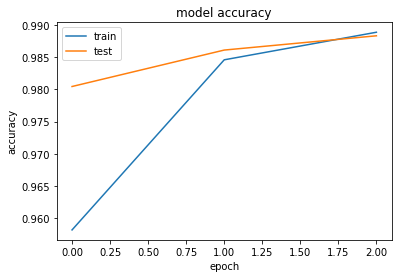

In [182]:
## plotting a graph for displaying the accuracy of the model
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [183]:
## Viewing the probability distribution for a multi-class classification
print("Probability distribution for a multi-class classification")
pred

Probability distribution for a multi-class classification


array([[1.7074191e-08, 3.6056733e-09, 5.6971262e-06, ..., 9.9996233e-01,
        6.4406485e-08, 2.8605318e-06],
       [6.6724930e-08, 1.0330314e-03, 9.9740440e-01, ..., 5.8561969e-08,
        8.7163517e-06, 7.0181964e-11],
       [5.6675958e-08, 9.9827456e-01, 3.2074214e-04, ..., 9.5387013e-04,
        2.4514552e-04, 1.6613386e-06],
       ...,
       [8.7413888e-08, 1.0955817e-07, 2.0394313e-07, ..., 3.0971138e-04,
        4.1270712e-05, 2.2996916e-03],
       [4.7641938e-06, 1.0141703e-05, 1.5298441e-06, ..., 2.1058561e-06,
        8.2842394e-04, 5.8995710e-07],
       [8.5749798e-06, 5.5494036e-07, 2.9215511e-05, ..., 1.5686515e-08,
        3.1857272e-07, 1.7436545e-07]], dtype=float32)

In [184]:
# Viewing the predicted value for a sample 
print(np.argmax(pred[2]))

1


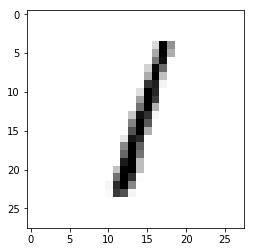

In [185]:
## Checking whether the predicted value returns a proper image for that prediction
sample_image = x_test_mnist[2].reshape((28,28))
plt.imshow(sample_image, cmap = plt.cm.binary)
plt.show()

In [186]:
df_confusion = pd.crosstab(y_test_mnist, np.argmax(pred,axis=1), rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted    0     1     2     3    4    5    6     7    8     9    All
Actual                                                                 
0.0        960     0     2     2    2    2    7     1    1     3    980
1.0          0  1121     2     1    0    2    2     2    3     2   1135
2.0          5     2   988    18    2    0    2    11    4     0   1032
3.0          0     0     3   989    0    5    1     7    2     3   1010
4.0          1     0     2     0  941    0    7     2    1    28    982
5.0          3     1     0    14    3  856    4     1    6     4    892
6.0          4     3     1     0    4    6  937     0    3     0    958
7.0          0     2     8     6    0    1    0   999    0    12   1028
8.0          4     1     2    10    5   10    4     7  923     8    974
9.0          3     3     0    10   10    1    1     6    1   974   1009
All        980  1133  1008  1050  967  883  965  1036  944  1034  10000


In [191]:
pred[1]

array([6.6724930e-08, 1.0330314e-03, 9.9740440e-01, 1.5450156e-03,
       3.9487902e-09, 8.4400281e-06, 3.3914100e-07, 5.8561969e-08,
       8.7163517e-06, 7.0181964e-11], dtype=float32)